JMJPFU

Lord bless this attempt of yours
24-March-2020
#### Scrapping text from pdf and word documents

Reference

https://www.geeksforgeeks.org/python-reading-contents-of-pdf-using-ocr-optical-character-recognition/

http://theautomatic.net/2019/10/14/how-to-read-word-documents-with-python/

https://automatetheboringstuff.com/chapter13/



In [2]:
!pip install pdf2image
!pip install pytesseract

Processing /home/acer/.cache/pip/wheels/0f/80/3a/fac1dc0f7dbe12c805b9dc6497f325f0e9f9cedbec3ab0185b/pdf2image-1.12.1-cp37-none-any.whl
Processing /home/acer/.cache/pip/wheels/82/1a/d0/a884540a5602305f5bb7ff44f05550be20453edce8fae69241/pytesseract-0.3.3-py2.py3-none-any.whl


In [31]:
!pip install nltk

     |████████████████████████████████| 1.5MB 1.4MB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.4.5-cp37-none-any.whl size=1449906 sha256=2fb0541e1b4f729ba51715f64a5c77a256f8fbc12f2c229a25ba48a383503b1a
  Stored in directory: /home/acer/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk


In [3]:
from PIL import Image 
import pytesseract 
import sys 
from pdf2image import convert_from_path 
import os 

In [4]:
# Path of the pdf 
PDF_file = "/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/Datasets/ResumeData/122579Ashish_Malhotra.pdf"

In [5]:
pages = convert_from_path(PDF_file, 500) 
pages

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=4135x5847 at 0x7FE61D7AF710>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=4135x5847 at 0x7FE61E426610>]

In [6]:
# Counter to store images of each page of PDF to image 
image_counter = 1

In [18]:
# Iterate through all the pages stored above 
for page in pages: 
  
    # Declaring filename for each page of PDF as JPG 
    # For each page, filename will be: 
    # PDF page 1 -> page_1.jpg 
    # PDF page 2 -> page_2.jpg 
    # PDF page 3 -> page_3.jpg 
    # .... 
    # PDF page n -> page_n.jpg 
    page
    filename = "page_"+str(image_counter)+".jpg"
      
    # Save the image of the page in system 
    page.save(filename, 'JPEG') 
  
    # Increment the counter to update filename 
    image_counter = image_counter + 1

In [13]:
filename = "page_"+str(image_counter)+".jpg"
filename

'page_3.jpg'

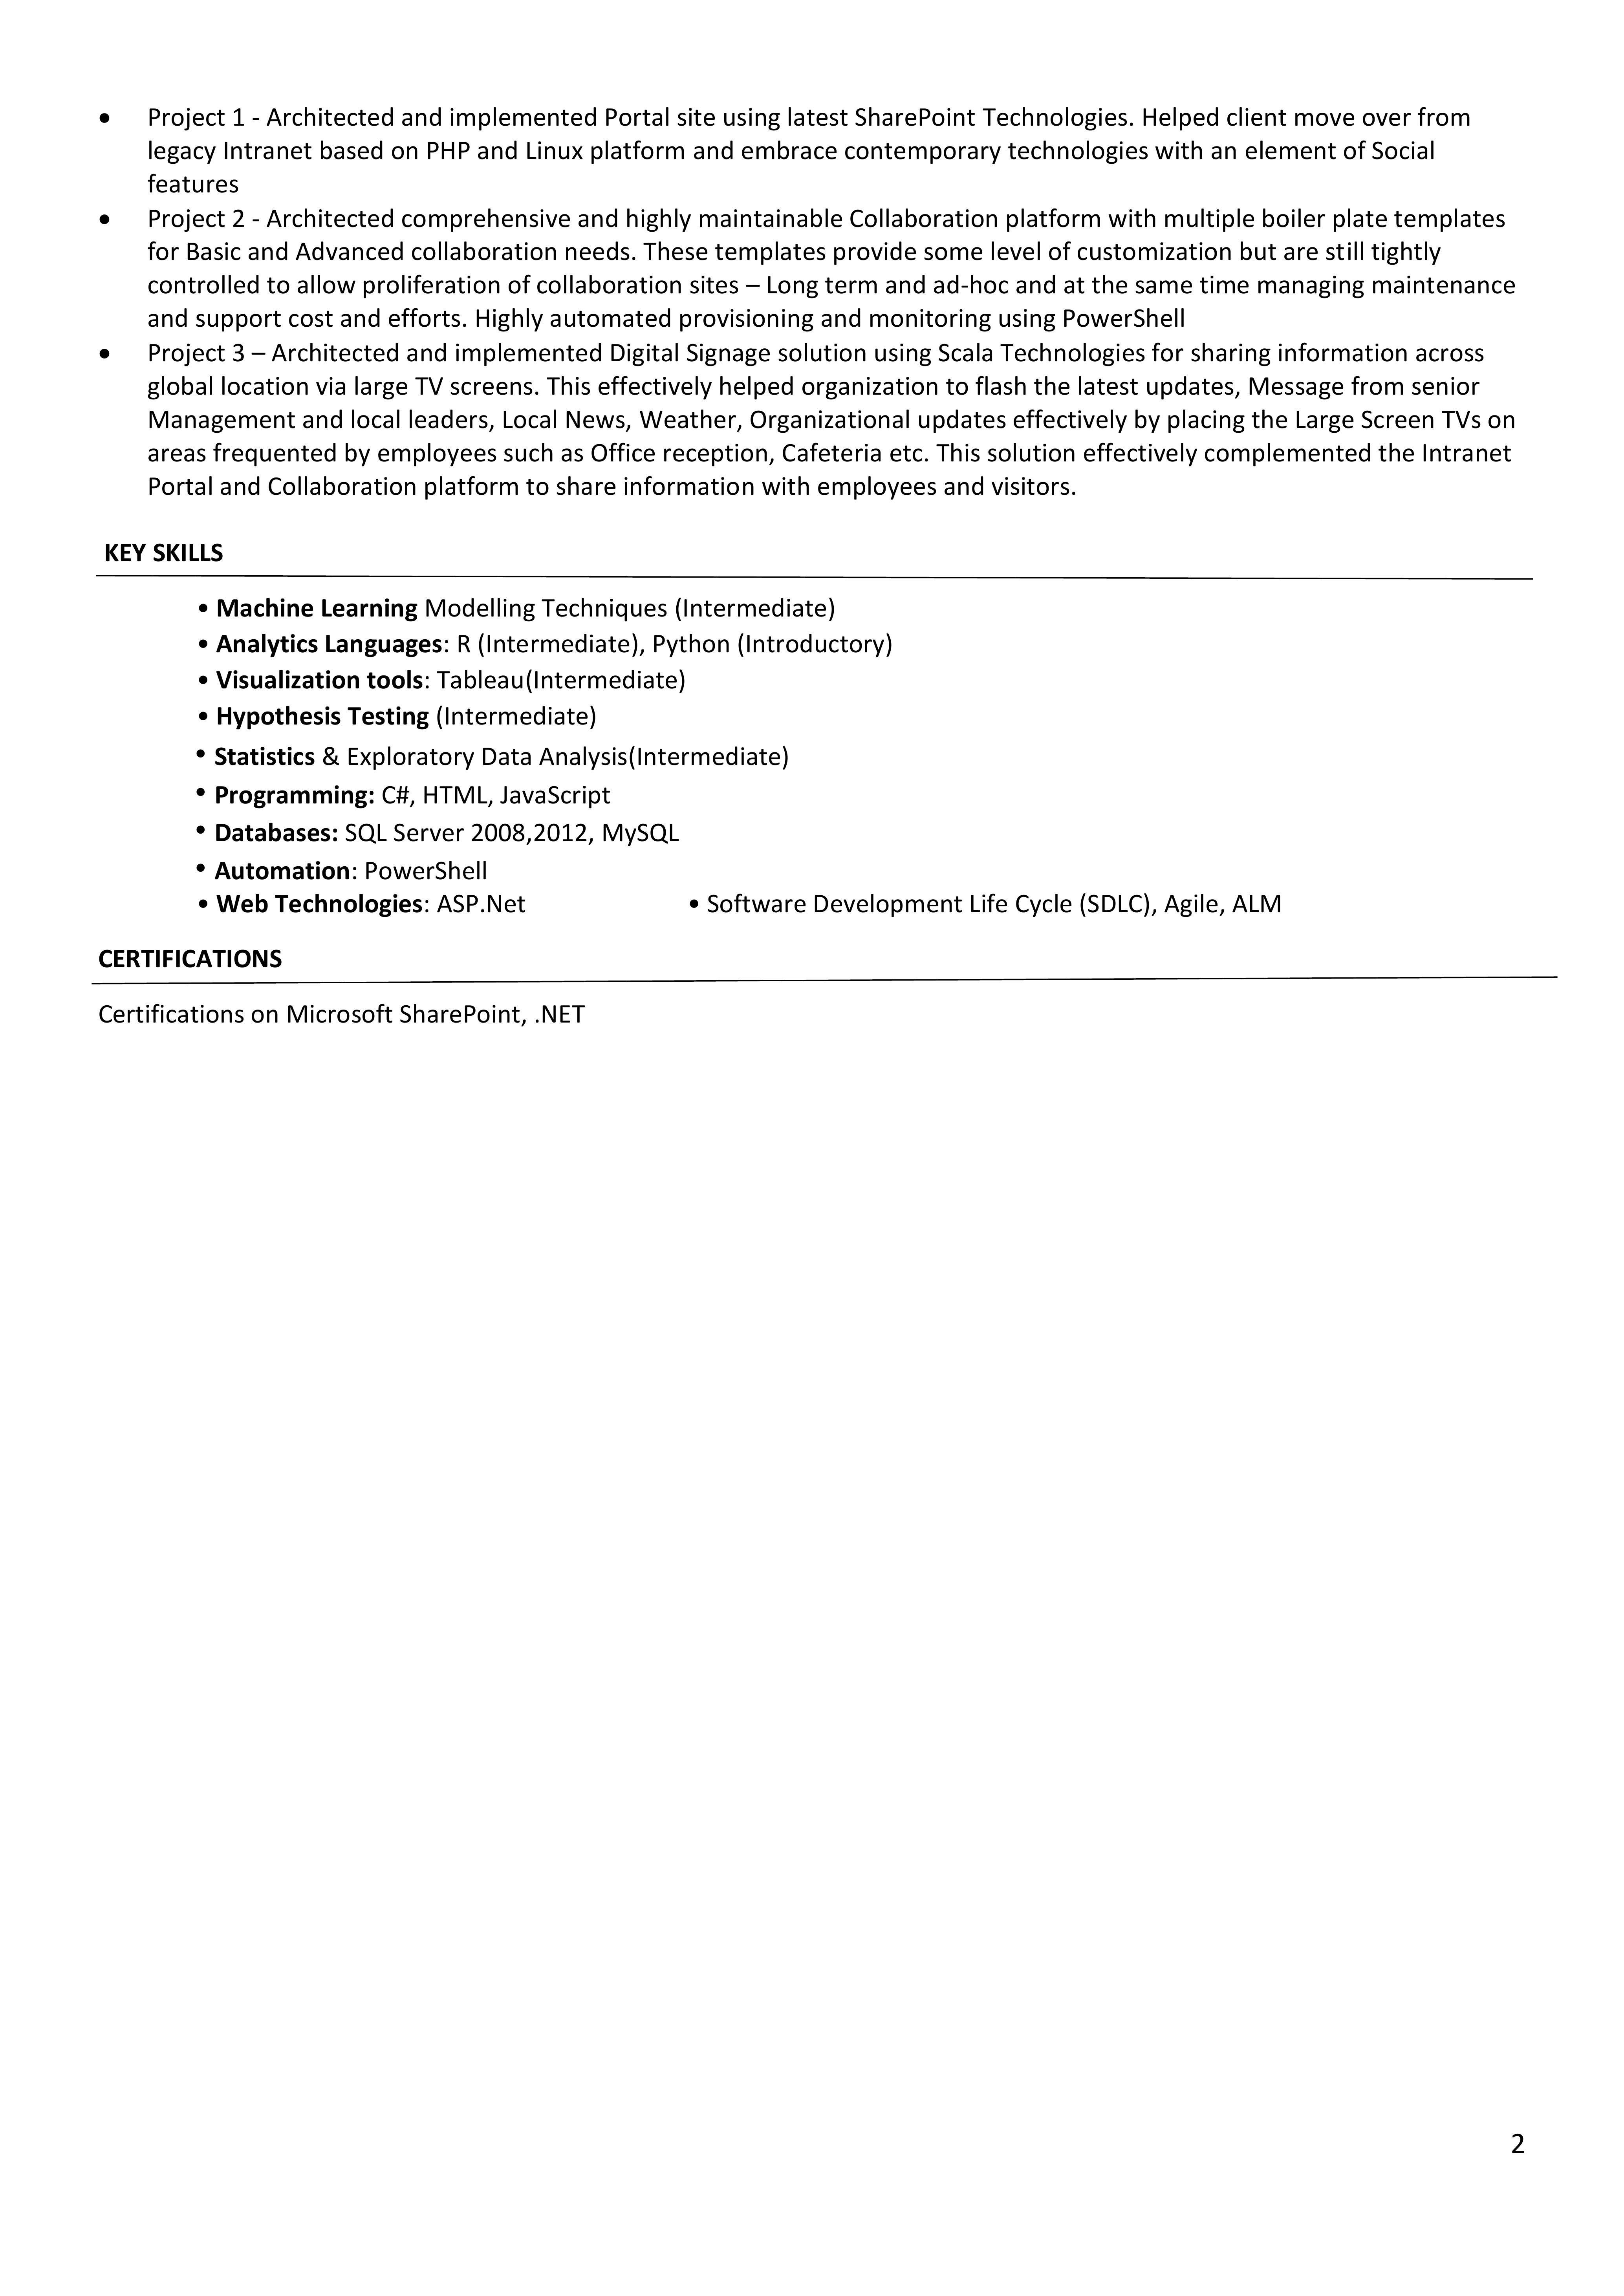

In [19]:
page

In [52]:
text = str(((pytesseract.image_to_string(page))))
text1 = text.split('\n\n')

In [53]:
text1

['e Project 1 - Architected and implemented Portal site using latest SharePoint Technologies. Helped client move over from\nlegacy Intranet based on PHP and Linux platform and embrace contemporary technologies with an element of Social\nfeatures',
 'e Project 2 - Architected comprehensive and highly maintainable Collaboration platform with multiple boiler plate templates\nfor Basic and Advanced collaboration needs. These templates provide some level of customization but are still tightly\ncontrolled to allow proliferation of collaboration sites — Long term and ad-hoc and at the same time managing maintenance\nand support cost and efforts. Highly automated provisioning and monitoring using PowerShell',
 'e Project 3 —Architected and implemented Digital Signage solution using Scala Technologies for sharing information across\nglobal location via large TV screens. This effectively helped organization to flash the latest updates, Message from senior\nManagement and local leaders, Local New

In [63]:
text1[10]

'¢ Automation: PowerShell\n¢ Web Technologies: ASP.Net e Software Development Life Cycle (SDLC), Agile, ALM'

In [66]:
tempText = text1[1].split('\n')

In [67]:
''.join(tempText)

'e Project 2 - Architected comprehensive and highly maintainable Collaboration platform with multiple boiler plate templatesfor Basic and Advanced collaboration needs. These templates provide some level of customization but are still tightlycontrolled to allow proliferation of collaboration sites — Long term and ad-hoc and at the same time managing maintenanceand support cost and efforts. Highly automated provisioning and monitoring using PowerShell'

In [ ]:
def split_string(string): 
  
    # Split the string based on space delimiter 
    list_string = string.split(' ') 
      
    return list_string 
  
def join_string(list_string): 
  
    # Join the string based on '-' delimiter 
    string = '-'.join(list_string) 
      
    return string 
  

In [9]:
#Part #2 - Recognizing text from the images using OCR 
    
# Variable to get count of total number of pages 
filelimit = image_counter-1
  
# Creating a text file to write the output 
outfile = "out_text.txt"
  
# Open the file in append mode so that  
# All contents of all images are added to the same file 
f = open(outfile, "a") 

# Iterate from 1 to total number of pages 
for i in range(1, filelimit + 1): 
  
    # Set filename to recognize text from 
    # Again, these files will be: 
    # page_1.jpg 
    # page_2.jpg 
    # .... 
    # page_n.jpg 
    filename = "page_"+str(i)+".jpg"
          
    # Recognize the text as string in image using pytesserct 
    text = str(((pytesseract.image_to_string(Image.open(filename))))) 
  
    # The recognized text is stored in variable text 
    # Any string processing may be applied on text 
    # Here, basic formatting has been done: 
    # In many PDFs, at line ending, if a word can't 
    # be written fully, a 'hyphen' is added. 
    # The rest of the word is written in the next line 
    # Eg: This is a sample text this word here GeeksF- 
    # orGeeks is half on first line, remaining on next. 
    # To remove this, we replace every '-\n' to ''. 
    #text = text.replace('-\n', '')     
  
    # Finally, write the processed text to the file. 
    f.write(text) 
  
# Close the file after writing all the text. 
f.close() 

In [10]:
text

'e Project 1 - Architected and implemented Portal site using latest SharePoint Technologies. Helped client move over from\nlegacy Intranet based on PHP and Linux platform and embrace contemporary technologies with an element of Social\nfeatures\n\ne Project 2 - Architected comprehensive and highly maintainable Collaboration platform with multiple boiler plate templates\nfor Basic and Advanced collaboration needs. These templates provide some level of customization but are still tightly\ncontrolled to allow proliferation of collaboration sites — Long term and ad-hoc and at the same time managing maintenance\nand support cost and efforts. Highly automated provisioning and monitoring using PowerShell\n\ne Project 3 —Architected and implemented Digital Signage solution using Scala Technologies for sharing information across\nglobal location via large TV screens. This effectively helped organization to flash the latest updates, Message from senior\nManagement and local leaders, Local News, 

In [12]:
file1 = open("out_text.txt","r+")  
resText = file1.readlines() 
resText

['Ashish Malhotra\n',
 '+1 5108097665; ashish42@gmail.com; Minneapolis\n',
 '\n',
 'PROFILE SUMMARY\n',
 '\n',
 ' \n',
 '\n',
 'e Seasoned IT professional with 19 years of experience, upskilled in Data Science — R, Excel, Tableau, Statistics etc. Deep\n',
 'skills in SQL, Microsoft SharePoint, Office 365 and Azure.\n',
 '\n',
 'e Looking for a meaningful transition to full time Digital Transformation Solution Expert by leveraging existing technology\n',
 'experience across domains and Data Science and Analytics skills acquired.\n',
 '\n',
 'e Working as Senior Technology Architect with Infosys since 2006. Successfully delivered multiple projects across clients\n',
 'based out of India and USA.\n',
 '\n',
 'ACADEMIC CREDENTIALS\n',
 '\n',
 ' \n',
 '\n',
 'e PG Diploma in Data Analytics | IIIT-Bangalore & UpGrad | CGPA 3.5/4 Since Sep 2017\n',
 'A comprehensive 11-month program taught by Industry experts and IIITB faculty; 7 case studies & projects; 400+ hours of\n',
 'academic learning 

In [42]:
# Reading the file

file1 = open("out_text.txt","r+")  
resText = file1.readlines() 

file1.close()  


In [43]:
resText

['Ashish Malhotra\n',
 '+1 5108097665; ashish42@gmail.com; Minneapolis\n',
 '\n',
 'PROFILE SUMMARY\n',
 '\n',
 ' \n',
 '\n',
 'e Seasoned IT professional with 19 years of experience, upskilled in Data Science — R, Excel, Tableau, Statistics etc. Deep\n',
 'skills in SQL, Microsoft SharePoint, Office 365 and Azure.\n',
 '\n',
 'e Looking for a meaningful transition to full time Digital Transformation Solution Expert by leveraging existing technology\n',
 'experience across domains and Data Science and Analytics skills acquired.\n',
 '\n',
 'e Working as Senior Technology Architect with Infosys since 2006. Successfully delivered multiple projects across clients\n',
 'based out of India and USA.\n',
 '\n',
 'ACADEMIC CREDENTIALS\n',
 '\n',
 ' \n',
 '\n',
 'e PG Diploma in Data Analytics | IIIT-Bangalore & UpGrad | CGPA 3.5/4 Since Sep 2017\n',
 'A comprehensive 11-month program taught by Industry experts and IIITB faculty; 7 case studies & projects; 400+ hours of\n',
 'academic learning 

In [18]:
resText[0].splitlines()

['Ashish Malhotra']

In [27]:
resDetails = []
for j in range(0,len(resText)):
    resDetails.append(resText[j].split('\n'))

In [28]:
resDetails

[['Ashish Malhotra', ''],
 ['+1 5108097665; ashish42@gmail.com; Minneapolis', ''],
 ['', ''],
 ['PROFILE SUMMARY', ''],
 ['', ''],
 [' ', ''],
 ['', ''],
 ['e Seasoned IT professional with 19 years of experience, upskilled in Data Science — R, Excel, Tableau, Statistics etc. Deep',
  ''],
 ['skills in SQL, Microsoft SharePoint, Office 365 and Azure.', ''],
 ['', ''],
 ['e Looking for a meaningful transition to full time Digital Transformation Solution Expert by leveraging existing technology',
  ''],
 ['experience across domains and Data Science and Analytics skills acquired.',
  ''],
 ['', ''],
 ['e Working as Senior Technology Architect with Infosys since 2006. Successfully delivered multiple projects across clients',
  ''],
 ['based out of India and USA.', ''],
 ['', ''],
 ['ACADEMIC CREDENTIALS', ''],
 ['', ''],
 [' ', ''],
 ['', ''],
 ['e PG Diploma in Data Analytics | IIIT-Bangalore & UpGrad | CGPA 3.5/4 Since Sep 2017',
  ''],
 ['A comprehensive 11-month program taught by Indust

In [39]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize



[nltk_data] Downloading package punkt to /home/acer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [44]:
resDetails2 = []
for j in range(0,len(resText)):
    resDetails2.append(sent_tokenize(resText[j]))
resDetails2

[['Ashish Malhotra'],
 ['+1 5108097665; ashish42@gmail.com; Minneapolis'],
 [],
 ['PROFILE SUMMARY'],
 [],
 [],
 [],
 ['e Seasoned IT professional with 19 years of experience, upskilled in Data Science — R, Excel, Tableau, Statistics etc.',
  'Deep'],
 ['skills in SQL, Microsoft SharePoint, Office 365 and Azure.'],
 [],
 ['e Looking for a meaningful transition to full time Digital Transformation Solution Expert by leveraging existing technology'],
 ['experience across domains and Data Science and Analytics skills acquired.'],
 [],
 ['e Working as Senior Technology Architect with Infosys since 2006.',
  'Successfully delivered multiple projects across clients'],
 ['based out of India and USA.'],
 [],
 ['ACADEMIC CREDENTIALS'],
 [],
 [],
 [],
 ['e PG Diploma in Data Analytics | IIIT-Bangalore & UpGrad | CGPA 3.5/4 Since Sep 2017'],
 ['A comprehensive 11-month program taught by Industry experts and IIITB faculty; 7 case studies & projects; 400+ hours of'],
 ['academic learning & 30+ hours

In [49]:
list2 = [e for e in resDetails2 if e]

In [50]:
list2

[['Ashish Malhotra'],
 ['+1 5108097665; ashish42@gmail.com; Minneapolis'],
 ['PROFILE SUMMARY'],
 ['e Seasoned IT professional with 19 years of experience, upskilled in Data Science — R, Excel, Tableau, Statistics etc.',
  'Deep'],
 ['skills in SQL, Microsoft SharePoint, Office 365 and Azure.'],
 ['e Looking for a meaningful transition to full time Digital Transformation Solution Expert by leveraging existing technology'],
 ['experience across domains and Data Science and Analytics skills acquired.'],
 ['e Working as Senior Technology Architect with Infosys since 2006.',
  'Successfully delivered multiple projects across clients'],
 ['based out of India and USA.'],
 ['ACADEMIC CREDENTIALS'],
 ['e PG Diploma in Data Analytics | IIIT-Bangalore & UpGrad | CGPA 3.5/4 Since Sep 2017'],
 ['A comprehensive 11-month program taught by Industry experts and IIITB faculty; 7 case studies & projects; 400+ hours of'],
 ['academic learning & 30+ hours of industry mentoring'],
 ['Master of Information

In [66]:
list2[5]

['e Looking for a meaningful transition to full time Digital Transformation Solution Expert by leveraging existing technology']

### Using PYPDF2

In [51]:
!pip install pypdf2

     |████████████████████████████████| 81kB 1.8MB/s eta 0:00:01
  Created wheel for pypdf2: filename=PyPDF2-1.26.0-cp37-none-any.whl size=61086 sha256=1a19d05c959acb2550b99ce1393fd171772e237eab305d53df085b587a963cea
  Stored in directory: /home/acer/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built pypdf2


In [52]:
import PyPDF2
pdfFileObj = open(PDF_file, 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
pdfReader.numPages
 

2

In [54]:
pageObj = pdfReader.getPage(0)


In [56]:
resText2 = pageObj.extractText()

In [61]:
resText2

'1\n \n \nAshish Malhotra\n \n+1 5108097665\n;\n \nashish42@gmail.com\n; Minneapolis\n \n \nPROFILE SUMMARY\n \n\n \nSeasoned \nIT \nprofessional with 19 years of \nexperience\n, \nupskilled in Data Science \n\n \nR, Excel, Tableau\n, Statistics etc\n. Deep \nskills in SQL, Microsoft SharePoint, Office 365 and Azure\n.\n \n\n \nLooking for a meaningful transition to full time \nDigital Transformation Solution Expert\n \nby \nleverag\ning \nexi\ns\nting technology \nexperience across domains\n \nand Data Science and Analytics skills acquired\n.\n \n\n \nW\norking as Senior Technology Architect with Infosys\n \nsince 2006\n.\n \nSuccessfully delivered multiple projects across clients \nbased out of India and USA.\n \n \nACADEMIC CREDENTIALS\n \n\n \nPG Diploma \nin Data Analytics\n \nI IIIT\n-\nBangalore & UpGrad   I  \nCGPA\n \n3.\n5\n \n/ 4\n \n \n \n \n            \nSince \nSep\n \n201\n7\n \nA comprehensive 11\n-\nmonth program taught by Industry experts and IIITB faculty; 7 case stu

In [60]:
resText2.splitlines()

['1',
 ' ',
 ' ',
 'Ashish Malhotra',
 ' ',
 '+1 5108097665',
 ';',
 ' ',
 'ashish42@gmail.com',
 '; Minneapolis',
 ' ',
 ' ',
 'PROFILE SUMMARY',
 ' ',
 '',
 ' ',
 'Seasoned ',
 'IT ',
 'professional with 19 years of ',
 'experience',
 ', ',
 'upskilled in Data Science ',
 '',
 ' ',
 'R, Excel, Tableau',
 ', Statistics etc',
 '. Deep ',
 'skills in SQL, Microsoft SharePoint, Office 365 and Azure',
 '.',
 ' ',
 '',
 ' ',
 'Looking for a meaningful transition to full time ',
 'Digital Transformation Solution Expert',
 ' ',
 'by ',
 'leverag',
 'ing ',
 'exi',
 's',
 'ting technology ',
 'experience across domains',
 ' ',
 'and Data Science and Analytics skills acquired',
 '.',
 ' ',
 '',
 ' ',
 'W',
 'orking as Senior Technology Architect with Infosys',
 ' ',
 'since 2006',
 '.',
 ' ',
 'Successfully delivered multiple projects across clients ',
 'based out of India and USA.',
 ' ',
 ' ',
 'ACADEMIC CREDENTIALS',
 ' ',
 '',
 ' ',
 'PG Diploma ',
 'in Data Analytics',
 ' ',
 'I IIIT',
 '

### Scrapping word documents

In [73]:
!pip install python-docx

import docx

     |████████████████████████████████| 5.5MB 4.7MB/s eta 0:00:01
  Created wheel for python-docx: filename=python_docx-0.8.10-cp37-none-any.whl size=184491 sha256=37cff68d81992cbdf28d47fdeb7e9d2a769101d714df9195e5b834d37b069255
  Stored in directory: /home/acer/.cache/pip/wheels/18/0b/a0/1dd62ff812c857c9e487f27d80d53d2b40531bec1acecfa47b
Successfully built python-docx


In [125]:
# Path of the pdf 
docx_file = "/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/Datasets/ResumeData/698192NatarajanG_DataScienceAnalytics_May18_v2.docx"

In [126]:
doc = docx.Document(docx_file)
doc

In [127]:
fullText = []
for para in doc.paragraphs:
    fullText.append(para.text)
    '\n'.join(fullText)

In [128]:
fullText

['Natarajan Ganapathi',
 '\t\t\t\t\tPhone:\t+91 9962802777',
 '     E-mail: ',
 '',
 'PROFILE SUMMARY',
 'Data and Analytics professional with 16+ years of experience in Consulting, Solutions & Delivery across multiple industry verticals, predominantly in Financial Services, Insurance & Retail. ',
 'Primary expertise in Data Engineering, Data Analysis, Data Visualization & Predictive Analytics in different products, tools and languages. ',
 'Played varied roles in both leadership as well as Individual Contributor roles and working in the intersection of business, data & technology.',
 'EDUCATION',
 'Post Graduate Diploma in Data Science from IIIT Bangalore : 11-month intensive program with courses covering, Data Management, Inferential Statistics, EDA, Predictive Analytics, Machine Learning, Big Data Analytics & Capstone Project (Ongoing). ',
 'Master of Technology (M. Tech)  in Industrial Engineering from Indian Institute of Technology, Delhi ',
 'Bachelor of Engineering in Mechanical

In [129]:
len(fullText)

57

In [130]:
fullText[54]

'[Client: Large Health Insurance Player in UK | Project: Siebel CRM implementation | Role: ETL Consultant] Delivered data integration solutions in Informatica, Trillium & Siebel EIM as a part of Siebel CRM & Siebel Analytics solution implementation. Project aimed at delivering single customer view by integrating customer, assets & transactional data from legacy & third party apps to Siebel CRM to Siebel Warehouse.  '

In [91]:
fullText[5].split('\t')

['Data and Analytics professional with 16+ years of experience in Consulting, Solutions & Delivery across multiple industry verticals, predominantly in Financial Services, Insurance & Retail. ']

In [131]:
list2 = [e for e in fullText if e]
list2

['Natarajan Ganapathi',
 '\t\t\t\t\tPhone:\t+91 9962802777',
 '     E-mail: ',
 'PROFILE SUMMARY',
 'Data and Analytics professional with 16+ years of experience in Consulting, Solutions & Delivery across multiple industry verticals, predominantly in Financial Services, Insurance & Retail. ',
 'Primary expertise in Data Engineering, Data Analysis, Data Visualization & Predictive Analytics in different products, tools and languages. ',
 'Played varied roles in both leadership as well as Individual Contributor roles and working in the intersection of business, data & technology.',
 'EDUCATION',
 'Post Graduate Diploma in Data Science from IIIT Bangalore : 11-month intensive program with courses covering, Data Management, Inferential Statistics, EDA, Predictive Analytics, Machine Learning, Big Data Analytics & Capstone Project (Ongoing). ',
 'Master of Technology (M. Tech)  in Industrial Engineering from Indian Institute of Technology, Delhi ',
 'Bachelor of Engineering in Mechanical Engi

In [132]:
indResume = []
for list1 in list2:
    list3 = list1.split('\t')
    for list31 in list3:
        list4 = [e for e in list31 if e]
        list4 = "".join(list4)        
        indResume.append(list4)

In [133]:
indResume

['Natarajan Ganapathi',
 '',
 '',
 '',
 '',
 '',
 'Phone:',
 '+91 9962802777',
 '     E-mail: ',
 'PROFILE SUMMARY',
 'Data and Analytics professional with 16+ years of experience in Consulting, Solutions & Delivery across multiple industry verticals, predominantly in Financial Services, Insurance & Retail. ',
 'Primary expertise in Data Engineering, Data Analysis, Data Visualization & Predictive Analytics in different products, tools and languages. ',
 'Played varied roles in both leadership as well as Individual Contributor roles and working in the intersection of business, data & technology.',
 'EDUCATION',
 'Post Graduate Diploma in Data Science from IIIT Bangalore : 11-month intensive program with courses covering, Data Management, Inferential Statistics, EDA, Predictive Analytics, Machine Learning, Big Data Analytics & Capstone Project (Ongoing). ',
 'Master of Technology (M. Tech)  in Industrial Engineering from Indian Institute of Technology, Delhi ',
 'Bachelor of Engineering 

In [135]:
indResume = [e for e in indResume if e]
indResume

['Natarajan Ganapathi',
 'Phone:',
 '+91 9962802777',
 '     E-mail: ',
 'PROFILE SUMMARY',
 'Data and Analytics professional with 16+ years of experience in Consulting, Solutions & Delivery across multiple industry verticals, predominantly in Financial Services, Insurance & Retail. ',
 'Primary expertise in Data Engineering, Data Analysis, Data Visualization & Predictive Analytics in different products, tools and languages. ',
 'Played varied roles in both leadership as well as Individual Contributor roles and working in the intersection of business, data & technology.',
 'EDUCATION',
 'Post Graduate Diploma in Data Science from IIIT Bangalore : 11-month intensive program with courses covering, Data Management, Inferential Statistics, EDA, Predictive Analytics, Machine Learning, Big Data Analytics & Capstone Project (Ongoing). ',
 'Master of Technology (M. Tech)  in Industrial Engineering from Indian Institute of Technology, Delhi ',
 'Bachelor of Engineering in Mechanical Engineering

JMJPFU

31-Mar-2020

### Named Entity Recognition from Text

We will now try to extract the names, organisation names etc from the text


### References for future exploration

https://towardsdatascience.com/named-entity-recognition-ner-meeting-industrys-requirement-by-applying-state-of-the-art-deep-698d2b3b4ede

In [142]:
#!pip install spacy
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_md-2.0.0/en_core_web_md-2.0.0.tar.gz

     |████████████████████████████████| 120.9MB 68kB/s  eta 0:00:01    |█████▊                          | 21.6MB 4.0MB/s eta 0:00:25     |██████████▌                     | 39.7MB 3.8MB/s eta 0:00:22     |██████████████████████████▊     | 100.9MB 525kB/s eta 0:00:39
  Created wheel for en-core-web-md: filename=en_core_web_md-2.0.0-cp37-none-any.whl size=122523223 sha256=a5e90e2524f99b72c8cddd1e344d44900278baf971e4de2201940e0bf4844041
  Stored in directory: /home/acer/.cache/pip/wheels/db/5d/d0/ccdad6b01f9695b4a33793158530b3228223ee31463441663d
Successfully built en-core-web-md


In [147]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0MB 127kB/s eta 0:00:01
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.5-cp37-none-any.whl size=12011740 sha256=ea6b095d9d6f0f268540fb1dc00816b8e901a097e7c12bff7964790a33206c23
  Stored in directory: /tmp/pip-ephem-wheel-cache-ebmyw934/wheels/6a/47/fb/6b5a0b8906d8e8779246c67d4658fd8a544d4a03a75520197a
Successfully built en-core-web-sm
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [145]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
#

In [148]:
nlp = spacy.load('en_core_web_sm')

In [169]:
import collections
from collections import defaultdict

In [190]:
resNer = {}

#resNer = collections.defaultdict()
for resline in indResume:
    doc = nlp(resline)
    for X in doc.ents:
        if X.label_ in resNer:
            resNer[X.label_].append(X.text)
        else:
            resNer[X.label_] = [X.text]
        
        

In [191]:
resNer

{'PERSON': ['Natarajan Ganapathi', 'M. Tech'],
 'ORG': ['Analytics',
  'Consulting, Solutions & Delivery',
  'Financial Services',
  'Insurance & Retail',
  'Data Engineering',
  'Data Visualization & Predictive Analytics',
  'Data Management',
  'Inferential Statistics',
  'EDA',
  'Predictive Analytics',
  'Big Data Analytics & Capstone Project',
  'Industrial Engineering',
  'Indian Institute of Technology',
  'AMA College of Engineering, Tamilnadu',
  'data & analytics',
  'BI',
  'Data',
  'Exploratory Data Analysis',
  'Tree Models',
  'Business Intelligence & Data',
  'TECHNOLOGY',
  'Azure ML Workbench & Jupyter',
  'SQL',
  'DAX',
  'SAS',
  'EDA',
  'Hypothesis',
  'Power BI',
  'Tableau & R',
  'SAP',
  'OWB, Talend & AWS',
  'SQL',
  'PL/SQL',
  'Shell Scripts',
  'Perl & Awk',
  'CSM',
  'CI',
  'Data & AI',
  'AWS & Azure',
  'PROJECTS & CONSULTING',
  'UW',
  'Lloyds',
  'SQL',
  'Power BI',
  'D&B',
  'UX',
  'RFM',
  'LTV',
  'Churn',
  'BI',
  'BI',
  'PDM',
  'Power 

In [160]:
doc.ents

(India, PL/SQL)

In [42]:
import pickle

pickle_in = open("/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/Datasets/ResumeData/outputData/pdf.pickle","rb")
example_dict = pickle.load(pickle_in)


In [43]:
example_dict

[['Ashish Malhotra +1 5108097665; ashish42@gmail.com; Minneapolis',
  'PROFILE SUMMARY',
  ' ',
  'e Seasoned IT professional with 19 years of experience, upskilled in Data Science — R, Excel, Tableau, Statistics etc. Deep skills in SQL, Microsoft SharePoint, Office 365 and Azure.',
  'e Looking for a meaningful transition to full time Digital Transformation Solution Expert by leveraging existing technology experience across domains and Data Science and Analytics skills acquired.',
  'e Working as Senior Technology Architect with Infosys since 2006. Successfully delivered multiple projects across clients based out of India and USA.',
  'ACADEMIC CREDENTIALS',
  ' ',
  'e PG Diploma in Data Analytics | IIIT-Bangalore & UpGrad | CGPA 3.5 / 4 Since Sep 2017 A comprehensive 11-month program taught by Industry experts and IIITB faculty; 7 case studies & projects; 400+ hours of academic learning & 30+ hours of industry mentoring Master of Information Technology | First Class with Honors |199

In [44]:
example_dict[0][44]

{'ORG': ['Ashish Malhotra',
  'Tableau',
  'SQL',
  'Microsoft SharePoint',
  'Analytics',
  'Working as Senior Technology Architect',
  'Infosys',
  'Data Analytics',
  'IIIT-Bangalore & UpGrad |',
  'Master of Information Technology',
  'Punjab Technical University',
  'B.E. (Electronics',
  'Univariate',
  'Loan Default Case Study',
  'Bank',
  'SharePoint Architect',
  'Infosys Limited',
  'Pharmacy Benefits Management',
  'Client Collaboration Portal',
  'SharePoint 2016',
  'FTP',
  'PHI',
  'non-PHI',
  'Joint Event',
  'SharePoint Architect',
  'Infosys Limited',
  'SharePoint Architect',
  'Infosys Limited',
  'Portal',
  'SharePoint Technologies',
  'PHP',
  'Social',
  'Collaboration',
  'Basic and Advanced',
  'PowerShell',
  'Digital Signage',
  'Scala Technologies',
  'Local News',
  'Weather',
  'the Intranet Portal',
  'Collaboration',
  'Python',
  'Statistics & Exploratory Data',
  'JavaScript',
  'SQL',
  'PowerShell',
  'CERTIFICATIONS',
  'Microsoft SharePoint'],
 

In [45]:
pickle_in_doc = open("/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/Datasets/ResumeData/outputData/doc.pickle","rb")
example_dict_doc = pickle.load(pickle_in_doc)
example_dict_doc

[['ASHA M JOHN',
  '9946145273; ashamjohn@gmail.com; Bangalore',
  'PROFILE SUMMARY',
  '12+  years of total IT industry experience encompassing a wide range of skill set, roles and industry verticals which includes 8 years of Java/J2EE application development and 4 years of Hadoop development.',
  ' ACADEMIC CREDENTIALS',
  'PG Diploma in Data Science I  IIIT-Bangalore & UpGrad   ',
  '    Since October 2017',
  'A comprehensive 11-month program taught by Industry experts and IIITB faculty; 7 case studies & projects; 400+ hours of academic learning & 30+ hours of industry mentoring',
  'Master of Computer Applications  ',
  '                                                                      ',
  '     September 2005',
  'Marthoma Institute of Information Technology | University of Kerala, Trivandrum',
  'B.Sc Computer Science ',
  '            ',
  '      May 2002',
  '        PGP College of Arts & Science | Periyar University, Salem',
  'ACADEMIC PROJECTS',
  'HR Analytics',
  'Au

In [199]:
len(example_dict_doc)

5

In [200]:
example_dict_doc[0]

['ASHA M JOHN',
 '9946145273; ashamjohn@gmail.com; Bangalore',
 'PROFILE SUMMARY',
 '12+  years of total IT industry experience encompassing a wide range of skill set, roles and industry verticals which includes 8 years of Java/J2EE application development and 4 years of Hadoop development.',
 ' ACADEMIC CREDENTIALS',
 'PG Diploma in Data Science I  IIIT-Bangalore & UpGrad   ',
 '    Since October 2017',
 'A comprehensive 11-month program taught by Industry experts and IIITB faculty; 7 case studies & projects; 400+ hours of academic learning & 30+ hours of industry mentoring',
 'Master of Computer Applications  ',
 '                                                                      ',
 '     September 2005',
 'Marthoma Institute of Information Technology | University of Kerala, Trivandrum',
 'B.Sc Computer Science ',
 '            ',
 '      May 2002',
 '        PGP College of Arts & Science | Periyar University, Salem',
 'ACADEMIC PROJECTS',
 'HR Analytics',
 'Automobiles price pre

In [202]:
len(example_dict_doc[0])

59

In [206]:
example_dict_doc[0][0:-1]

['ASHA M JOHN',
 '9946145273; ashamjohn@gmail.com; Bangalore',
 'PROFILE SUMMARY',
 '12+  years of total IT industry experience encompassing a wide range of skill set, roles and industry verticals which includes 8 years of Java/J2EE application development and 4 years of Hadoop development.',
 ' ACADEMIC CREDENTIALS',
 'PG Diploma in Data Science I  IIIT-Bangalore & UpGrad   ',
 '    Since October 2017',
 'A comprehensive 11-month program taught by Industry experts and IIITB faculty; 7 case studies & projects; 400+ hours of academic learning & 30+ hours of industry mentoring',
 'Master of Computer Applications  ',
 '                                                                      ',
 '     September 2005',
 'Marthoma Institute of Information Technology | University of Kerala, Trivandrum',
 'B.Sc Computer Science ',
 '            ',
 '      May 2002',
 '        PGP College of Arts & Science | Periyar University, Salem',
 'ACADEMIC PROJECTS',
 'HR Analytics',
 'Automobiles price pre

### Task 3 : Classification of the text to the relevant category

In [222]:
ResClass = pd.DataFrame()
for docs in [example_dict,example_dict_doc]:
    for files in docs:
        res1 = pd.DataFrame(files[0:-1])
        ResClass = pd.concat([ResClass,res1])
        




In [223]:

ResClass

,0
0,Ashish Malhotra +1 5108097665; ashish42@gmail....
1,PROFILE SUMMARY
2,
3,e Seasoned IT professional with 19 years of ex...
4,e Looking for a meaningful transition to full ...
...,...
5,5. Implementing the solutions from the proof o...
6,6. Fine tuning of models and solutions to impr...
7,The proportion of time one spends on these act...
8,People at junior levels are predominantly exec...


In [225]:
ResClass.to_csv('/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/Datasets/ResumeData/outputData/ResClass.csv',index=False)

The csv file was classified manually. Now to build a classification model on the data

In [2]:
import pandas as pd
Resclass_File_Path = '/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/Datasets/ResumeData/outputData/ResClass.csv'
Resclass = pd.read_csv(Resclass_File_Path,encoding = "ISO-8859-1")
Resclass

,Data,Class,Unnamed: 2
0,Ashish Malhotra +1 5108097665,Name,NaN
1,ashish42@gmail.com,email,NaN
2,Minneapolis,location,NaN
3,PROFILE SUMMARY,Profile_summary,NaN
4,,BS,NaN
...,...,...,...
426,"English, Hindi and Malayalam",Profile_summary,NaN
427,Visa Status :,Profile_summary,NaN
428,USA Business visa valid till Sep 2023,Profile_summary,NaN
429,Reference :,Profile_summary,NaN


In [3]:
Resclass.pop('Unnamed: 2')
Resclass

,Data,Class
0,Ashish Malhotra +1 5108097665,Name
1,ashish42@gmail.com,email
2,Minneapolis,location
3,PROFILE SUMMARY,Profile_summary
4,,BS
...,...,...
426,"English, Hindi and Malayalam",Profile_summary
427,Visa Status :,Profile_summary
428,USA Business visa valid till Sep 2023,Profile_summary
429,Reference :,Profile_summary


In [4]:
y = Resclass.pop('Class')
y

0                 Name
1                email
2             location
3      Profile_summary
4                   BS
            ...       
426    Profile_summary
427    Profile_summary
428    Profile_summary
429    Profile_summary
430    Profile_summary
Name: Class, Length: 431, dtype: object

In [5]:
Resclass

,Data
0,Ashish Malhotra +1 5108097665
1,ashish42@gmail.com
2,Minneapolis
3,PROFILE SUMMARY
4,
...,...
426,"English, Hindi and Malayalam"
427,Visa Status :
428,USA Business visa valid till Sep 2023
429,Reference :


Build features using BERT model 

In [1]:
import torch
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)


# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [12]:
# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased')
# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): BertLayerNorm()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): BertLayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
        (intermediate): BertIntermediate(
          (dense): Lin

In [6]:
def genMeanvec(string):
    marked_text = "[CLS] " + string + " [SEP]"
    # Tokenize our sentence with the BERT tokenizer.
    tokenized_text = tokenizer.tokenize(marked_text)
    # Generating the indexed tokens
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
    # Mark each of the token as belonging to sentence "1".
    segments_ids = [1] * len(tokenized_text)
    # Convert inputs to PyTorch tensors
    tokens_tensor = torch.tensor([indexed_tokens])
    segments_tensors = torch.tensor([segments_ids])
    # Predict hidden states features for each layer
    with torch.no_grad():
        encoded_layers, _ = model(tokens_tensor, segments_tensors)
    # Concatenate the tensors for all layers. We use `stack` here to
    # create a new dimension in the tensor.
    token_embeddings = torch.stack(encoded_layers, dim=0)
    # Remove dimension 1, the "batches".
    token_embeddings = torch.squeeze(token_embeddings, dim=1)
    # Taking the mean of layers from 1 to last layer
    avg_embedding = torch.mean(token_embeddings[1:], dim=0)
    # Calculate the average of all token vectors.
    sentence_embedding = torch.mean(avg_embedding, dim=0)
    # Convert into a numpy array
    numpy_embedding = sentence_embedding.numpy()
    return numpy_embedding

In [14]:
import pandas as pd
resData = []
for i in range(0,len(Resclass)):
    resData.append(genMeanvec(str(Resclass['Data'][i])))
    


In [15]:
resData = pd.DataFrame(resData)
resData.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.223686,0.006643,0.035408,-0.355242,0.587216,-0.246097,0.214594,-0.036403,-0.449958,0.006190,...,-0.135745,0.236234,-0.208028,-0.283886,0.366807,0.048764,0.353892,-0.236700,0.108611,0.110786
1,0.457096,-0.279468,0.138342,-0.091852,0.170678,-0.120572,0.471718,0.210619,-0.395368,-0.399823,...,-0.067068,-0.324455,-0.491594,-0.323651,0.291410,-0.203328,0.124921,-0.154348,0.233993,0.013199
2,-0.059692,0.018255,-0.374216,-0.213159,-0.189434,0.362403,0.285468,0.121227,-0.314213,-0.629737,...,-0.069589,-0.093391,-0.491096,0.007735,0.146968,0.005334,0.042230,-0.042296,-0.407002,-0.120627
3,0.276205,-0.028900,0.143105,-0.230968,0.128456,0.517655,0.222086,-0.003059,-0.094450,-0.399625,...,0.191938,-0.024774,-0.232772,-0.058106,0.330060,-0.312965,-0.034809,-0.281195,-0.305281,-0.175862
4,-0.392614,-0.337626,-0.429829,0.082926,-0.121831,0.011601,0.143401,-0.105433,-0.043461,-0.467645,...,-0.099998,0.076155,-0.514762,-0.394009,0.314998,-0.221133,-0.174375,-0.151652,-0.416954,0.319678


In [16]:
resData.shape

(431, 768)

In [17]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(resData, y, test_size=0.3, random_state=123)

In [18]:
X_train.shape

(301, 768)

In [21]:
# Importing necessary libraries
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline

# Creating a list of the classifiers
classifiers = [
    KNeighborsClassifier(),     
    RandomForestClassifier(random_state=123),
    AdaBoostClassifier(random_state=123),
    LogisticRegression(random_state=123)
    ]

In [22]:
# Looping through classifiers to get the best model
for classifier in classifiers:
    estimator = Pipeline(steps =[('classifier',classifier)])
    estimator.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.2f" % estimator.score(X_test, y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
model score: 0.72
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)
model score: 0.72
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)
model score: 0.41
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
  

/home/acer/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [23]:
# Predicting with the best estimator
pred = estimator.predict(resData)

In [26]:
Resclass['preds'] = pred

In [28]:
Resclass['class'] = y
Resclass

,Data,preds,class
0,Ashish Malhotra +1 5108097665,Name,Name
1,ashish42@gmail.com,email,email
2,Minneapolis,location,location
3,PROFILE SUMMARY,Profile_summary,Profile_summary
4,,BS,BS
...,...,...,...
426,"English, Hindi and Malayalam",Academic_credentials,Profile_summary
427,Visa Status :,Profile_summary,Profile_summary
428,USA Business visa valid till Sep 2023,Profile_summary,Profile_summary
429,Reference :,Profile_summary,Profile_summary


In [29]:
Resclass.to_csv('/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/Datasets/ResumeData/outputData/resClasified.csv',index=False)

In [31]:
import pickle
modelFilepath = '/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/Datasets/ResumeData/outputData' + '/' + "estimator.pickle"

modelfile = open(modelFilepath,"wb")
pickle.dump(estimator, modelfile)
modelfile.close()

JMJPFU
2-April-2020

### Getting all the basic data in a particular form

Now that we have done some basic tasks, we will now concentrate on getting different features of the resume in a data structure. For now we will concentrate on getting all the information in a dictionary format

In [41]:
Resume_File_Path = '/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/Datasets/ResumeData/Resumefiles'
import os
for (path,_,files) in os.walk(Resume_File_Path):
    print(path)
    #print(files)
    for i,file in enumerate(files):
        #print(file)
        name = os.path.splitext(file)[-2]
        print(name)
        print(i)
    

/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/Datasets/ResumeData/Resumefiles
109459Asha_JohnData+Science_Resume
0
122579Ashish_Malhotra
1
496298Amrita_Bhadrannavar
2
698192NatarajanG_DataScienceAnalytics_May18_v2
3
956637Anindam_Resume
4
958090Radhika_Ramachandran_Detailed_Resume+
5


In [36]:
os.path.splitext(file)

('ResClass', '.csv')

JMJPFU
3-Apr-2020

### Structuring the processed text files

The next task is to take the processed resume documents and do the following

1. Create a new dictionary to store the details
2. Classify the text 
3. Load the respective vectors of the classes in the dictionary
4. Calculate some vectors for the key words extracted from the NER exercise
5. Store all these details into a single dictionary


Lord bless this attempt of yours

In [46]:
pickle_in_doc = open("/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/Datasets/ResumeData/outputData/doc.pickle","rb")
example_dict_doc = pickle.load(pickle_in_doc)
example_dict_doc[0]

['ASHA M JOHN',
 '9946145273; ashamjohn@gmail.com; Bangalore',
 'PROFILE SUMMARY',
 '12+  years of total IT industry experience encompassing a wide range of skill set, roles and industry verticals which includes 8 years of Java/J2EE application development and 4 years of Hadoop development.',
 ' ACADEMIC CREDENTIALS',
 'PG Diploma in Data Science I  IIIT-Bangalore & UpGrad   ',
 '    Since October 2017',
 'A comprehensive 11-month program taught by Industry experts and IIITB faculty; 7 case studies & projects; 400+ hours of academic learning & 30+ hours of industry mentoring',
 'Master of Computer Applications  ',
 '                                                                      ',
 '     September 2005',
 'Marthoma Institute of Information Technology | University of Kerala, Trivandrum',
 'B.Sc Computer Science ',
 '            ',
 '      May 2002',
 '        PGP College of Arts & Science | Periyar University, Salem',
 'ACADEMIC PROJECTS',
 'HR Analytics',
 'Automobiles price pre

In [52]:
# Extracting the name from the dictionary
example_dict_doc[0][-1]['ResumeName']

'109459Asha_JohnData+Science_Resume'

In [91]:
example_dict_doc[3][0:-1]

['Radhika Ramachandran',
 '9482224368; ; Bangalore',
 'PROFILE SUMMARY',
 'Senior Technical Lead with 12+ years of versatile experience in IT industry',
 'Excellent analytical and problem solving skills and ability to learn new technologies.',
 'Applied skills in SDLC, Product Requirement Document and agile methodologies for operational efficiency',
 'Possess good experience in Software development management, Delivery management and Client\\Partner Interfacing',
 'ACADEMIC CREDENTIALS',
 'PG Diploma in Data Science IIIT-Bangalore & UpGrad   I  CGPA 3.35 / 4',
 '        Since July 2017',
 'A comprehensive 11-month program taught by Industry experts and IIITB faculty; 7 case studies & projects; 400+ hours of academic learning & 30+ hours of industry mentoring',
 'Consistently scored 100 percent on all projects for data management, statistics and predictive analytics courses',
 'Master of Computer Applications , Cochin University of Science and Technology          1997 - 2000      ',
 'B

In [100]:
estimator.classes_

array(['Academic_credentials', 'BS', 'Certifications', 'Date',
       'Key_projects', 'Name', 'Profile_summary', 'Skills', 'Work_exp',
       'accolades', 'email', 'location', 'phone'], dtype=object)

In [102]:
# Creating a dictionary for storing each customers details
indResDic = {'ResumeName':[],'Name':[],'Academic_credentials':[],'Certifications':[],'Date':[],'Key_projects':[],'Profile_summary':[],'Skills':[],'Work_exp':[],'accolades':[],'email':[],'location':[],'phone':[]}


In [109]:
# 
indResDic['ResumeName'].append('Mathew')
indResDic

{'ResumeName': ['109459Asha_JohnData+Science_Resume', 'Toms', 'Mathew'],
 'Name': [],
 'Academic_credentials': [],
 'Certifications': [],
 'Date': [],
 'Key_projects': [],
 'Profile_summary': [],
 'Skills': [],
 'Work_exp': [],
 'accolades': [],
 'email': [],
 'location': [],
 'phone': []}

In [111]:
#resume = example_dict_doc[0]
len(resume[0:-1])

58

In [132]:
allResume = []
allRecume_vector = []
for resume in example_dict_doc:
    # Creating a dictionary for storing each customers details
    indResDic = {'ResumeName':[],'Name':[],'Academic_credentials':[],'Certifications':[],'Date':[],'Key_projects':[],'Profile_summary':[],'Skills':[],'Work_exp':[],'accolades':[],'email':[],'location':[],'phone':[]}
    indResDic_docs = {'ResumeName':[],'Name':[],'Academic_credentials':[],'Certifications':[],'Date':[],'Key_projects':[],'Profile_summary':[],'Skills':[],'Work_exp':[],'accolades':[],'email':[],'location':[],'phone':[]}
    # First get the resume Name
    indResDic['ResumeName'].append(resume[-1]['ResumeName'])
    indResDic_docs['ResumeName'].append(resume[-1]['ResumeName'])
    # Loop through all the text in the resume    
    for i in range(0,len(resume[0:-1])):
        docs = resume[0:-1][i].split(';')
        for doc in docs:
            tempVector = genMeanvec(str(doc))
            tempVector = tempVector.reshape((1,tempVector.shape[0]))
            pred = estimator.predict(tempVector)
            if pred[0] == 'BS':
                continue
            else:
                indResDic[pred[0]].append(tempVector)
                indResDic_docs[pred[0]].append(doc)
    allResume.append(indResDic_docs)
    allRecume_vector.append(indResDic)
    
       

In [134]:
len(allRecume_vector)

4

In [142]:
allResume[3]

{'ResumeName': ['958090Radhika_Ramachandran_Detailed_Resume+'],
 'Name': ['Radhika Ramachandran'],
 'Academic_credentials': ['ACADEMIC CREDENTIALS',
  'PG Diploma in Data Science IIIT-Bangalore & UpGrad   I  CGPA 3.35 / 4',
  'A comprehensive 11-month program taught by Industry experts and IIITB faculty',
  ' 400+ hours of academic learning & 30+ hours of industry mentoring',
  'Consistently scored 100 percent on all projects for data management, statistics and predictive analytics courses',
  'Master of Computer Applications , Cochin University of Science and Technology          1997 - 2000      ',
  'BSc[Hons] in Mathematics, Sri Sathya Sai Institute of Higher Learning                              1992 -1996',
  'English, Hindi and Malayalam'],
 'Certifications': [],
 'Date': ['        Since July 2017',
  'Duration',
  ': Oct2014 – till date ',
  'Duration',
  ': Sep2012 – Oct2014 ',
  'Duration',
  ': Jan2011 – Jun 2012',
  'Duration',
  ': Mar2010 – Dec 2010',
  'Duration',
  ': Se

In [131]:
# 'ResumeName','Name','Academic_credentials','Certifications','Date','Key_projects','Profile_summary','Skills','Work_exp','accolades','email','location','phone'
var1 = 'phone'
doc1 = indResDic_docs[var1]
doc2 = indResDic[var1]
print('Length of doc1',len(doc1))
print('Length of doc2',len(doc2))
print(doc1)


Length of doc1 1
Length of doc2 1
['9946145273']


In [144]:
example_dict_doc[3][-1]

{'PERSON': ['Radhika Ramachandran',
  'Linear Regression',
  'Ledger',
  'Jun 2012',
  'KYC(Know Your Client',
  'Mar2010',
  'Development Engineer',
  'epiLearn',
  'Macromedia Flash',
  'Documenter',
  'Documentations',
  'Rationalrobot',
  'Rationalrobot',
  'Rationalrobot',
  'Rationalrobot',
  'Rationalrobot',
  'Epiplex',
  'Jun 2005',
  'Hindi'],
 'DATE': ['9482224368',
  '12+ years',
  'July 2017',
  '1997 - 2000',
  '1992',
  'two consecutive years',
  'daily',
  'monthly',
  'daily',
  'daily',
  'the period of years',
  'Dec 2005',
  'Nov 2009',
  '2007',
  '2007',
  '2 months',
  'November 1983',
  '1956',
  '2023'],
 'GPE': ['Bangalore',
  'US',
  'US',
  'Bangalore',
  'Oct2014',
  'Bangalore',
  'Sep2012',
  'Bangalore Liaising',
  'Dallas',
  'Texas',
  'Jan2011',
  'Bangalore',
  'Bangalore',
  'India',
  'Kannur',
  'Kerala',
  'Kannur'],
 'ORG': ['SDLC',
  'Product Requirement Document',
  'IIITB',
  'Cochin University of Science and Technology',
  'Sri Sathya Sai In

Trying appending one dictionary into another

In [145]:
testDic = allResume[3]
testDic.update(example_dict_doc[3][-1])
testDic

{'ResumeName': '958090Radhika_Ramachandran_Detailed_Resume+',
 'Name': ['Radhika Ramachandran'],
 'Academic_credentials': ['ACADEMIC CREDENTIALS',
  'PG Diploma in Data Science IIIT-Bangalore & UpGrad   I  CGPA 3.35 / 4',
  'A comprehensive 11-month program taught by Industry experts and IIITB faculty',
  ' 400+ hours of academic learning & 30+ hours of industry mentoring',
  'Consistently scored 100 percent on all projects for data management, statistics and predictive analytics courses',
  'Master of Computer Applications , Cochin University of Science and Technology          1997 - 2000      ',
  'BSc[Hons] in Mathematics, Sri Sathya Sai Institute of Higher Learning                              1992 -1996',
  'English, Hindi and Malayalam'],
 'Certifications': [],
 'Date': ['        Since July 2017',
  'Duration',
  ': Oct2014 – till date ',
  'Duration',
  ': Sep2012 – Oct2014 ',
  'Duration',
  ': Jan2011 – Jun 2012',
  'Duration',
  ': Mar2010 – Dec 2010',
  'Duration',
  ': Sep 

In [97]:
pred[0]

'BS'

### MongoDB connections


https://www.youtube.com/watch?v=MfSf51W31HQ

In [19]:
import pickle
pickle_in_vec = open("/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/Datasets/ResumeData/outputData/vector.pickle","rb")
example_dict_vec = pickle.load(pickle_in_vec)
example_dict_vec[0]

{'ResumeName': ['958090Radhika_Ramachandran_Detailed_Resume+'],
 'Name': ['[[ 2.70318627e-01 -4.92330462e-01 -3.96756865e-02 -4.03839231e-01\n   8.59391212e-01  1.35934740e-01  1.00636852e+00 -2.85455883e-01\n  -3.74622971e-01  5.02914906e-01 -6.43000081e-02  2.51167178e-01\n  -8.15300718e-02 -1.55063078e-01  5.95345274e-02  6.50457203e-01\n   5.22654235e-01 -5.50607219e-02  6.11146390e-01  2.74110049e-01\n  -6.61255777e-01 -1.10546924e-01  2.42060088e-02  5.48975408e-01\n  -4.47656587e-02  2.69980222e-01  1.03055760e-01  5.00476897e-01\n   1.77809551e-01  8.12455490e-02 -3.64852875e-01 -4.27728713e-01\n   3.76443207e-01  2.25853533e-01 -2.07124949e-01 -1.50047064e-01\n  -3.30447972e-01  3.35375100e-01  6.81347921e-02 -7.62230873e-01\n  -6.53512031e-02 -7.22037852e-01  1.49638489e-01  1.47739410e-01\n   5.78314304e-01 -2.71811813e-01 -1.47581398e-01  1.84941456e-01\n   5.12311041e-01 -3.26515883e-01  1.36998236e-01 -2.61372447e-01\n  -2.24843130e-01 -2.36367613e-01  3.85851532e-01 -6.5

In [30]:
example_dict_vec[0].keys()

dict_keys(['ResumeName', 'Name', 'Academic_credentials', 'Certifications', 'Date', 'Key_projects', 'Profile_summary', 'Skills', 'Work_exp', 'accolades', 'email', 'location', 'phone', '_id'])

In [20]:
for col in example_dict_vec:
    print(col['ResumeName'])

['958090Radhika_Ramachandran_Detailed_Resume+']


In [6]:
example_dict_vec[0]['Name']

['[[ 2.70318627e-01 -4.92330462e-01 -3.96756865e-02 -4.03839231e-01\n   8.59391212e-01  1.35934740e-01  1.00636852e+00 -2.85455883e-01\n  -3.74622971e-01  5.02914906e-01 -6.43000081e-02  2.51167178e-01\n  -8.15300718e-02 -1.55063078e-01  5.95345274e-02  6.50457203e-01\n   5.22654235e-01 -5.50607219e-02  6.11146390e-01  2.74110049e-01\n  -6.61255777e-01 -1.10546924e-01  2.42060088e-02  5.48975408e-01\n  -4.47656587e-02  2.69980222e-01  1.03055760e-01  5.00476897e-01\n   1.77809551e-01  8.12455490e-02 -3.64852875e-01 -4.27728713e-01\n   3.76443207e-01  2.25853533e-01 -2.07124949e-01 -1.50047064e-01\n  -3.30447972e-01  3.35375100e-01  6.81347921e-02 -7.62230873e-01\n  -6.53512031e-02 -7.22037852e-01  1.49638489e-01  1.47739410e-01\n   5.78314304e-01 -2.71811813e-01 -1.47581398e-01  1.84941456e-01\n   5.12311041e-01 -3.26515883e-01  1.36998236e-01 -2.61372447e-01\n  -2.24843130e-01 -2.36367613e-01  3.85851532e-01 -6.50350824e-02\n   3.24614614e-01 -3.20269257e-01  2.73556784e-02  1.3357009

In [9]:
numpStr = example_dict_vec[0]['Name'][0][2:-2]
numpStr

' 2.70318627e-01 -4.92330462e-01 -3.96756865e-02 -4.03839231e-01\n   8.59391212e-01  1.35934740e-01  1.00636852e+00 -2.85455883e-01\n  -3.74622971e-01  5.02914906e-01 -6.43000081e-02  2.51167178e-01\n  -8.15300718e-02 -1.55063078e-01  5.95345274e-02  6.50457203e-01\n   5.22654235e-01 -5.50607219e-02  6.11146390e-01  2.74110049e-01\n  -6.61255777e-01 -1.10546924e-01  2.42060088e-02  5.48975408e-01\n  -4.47656587e-02  2.69980222e-01  1.03055760e-01  5.00476897e-01\n   1.77809551e-01  8.12455490e-02 -3.64852875e-01 -4.27728713e-01\n   3.76443207e-01  2.25853533e-01 -2.07124949e-01 -1.50047064e-01\n  -3.30447972e-01  3.35375100e-01  6.81347921e-02 -7.62230873e-01\n  -6.53512031e-02 -7.22037852e-01  1.49638489e-01  1.47739410e-01\n   5.78314304e-01 -2.71811813e-01 -1.47581398e-01  1.84941456e-01\n   5.12311041e-01 -3.26515883e-01  1.36998236e-01 -2.61372447e-01\n  -2.24843130e-01 -2.36367613e-01  3.85851532e-01 -6.50350824e-02\n   3.24614614e-01 -3.20269257e-01  2.73556784e-02  1.33570090e-

In [10]:
import numpy as np

numpar = np.fromstring(numpStr, dtype=float, sep=' ')
numpar

array([ 2.70318627e-01, -4.92330462e-01, -3.96756865e-02, -4.03839231e-01,
        8.59391212e-01,  1.35934740e-01,  1.00636852e+00, -2.85455883e-01,
       -3.74622971e-01,  5.02914906e-01, -6.43000081e-02,  2.51167178e-01,
       -8.15300718e-02, -1.55063078e-01,  5.95345274e-02,  6.50457203e-01,
        5.22654235e-01, -5.50607219e-02,  6.11146390e-01,  2.74110049e-01,
       -6.61255777e-01, -1.10546924e-01,  2.42060088e-02,  5.48975408e-01,
       -4.47656587e-02,  2.69980222e-01,  1.03055760e-01,  5.00476897e-01,
        1.77809551e-01,  8.12455490e-02, -3.64852875e-01, -4.27728713e-01,
        3.76443207e-01,  2.25853533e-01, -2.07124949e-01, -1.50047064e-01,
       -3.30447972e-01,  3.35375100e-01,  6.81347921e-02, -7.62230873e-01,
       -6.53512031e-02, -7.22037852e-01,  1.49638489e-01,  1.47739410e-01,
        5.78314304e-01, -2.71811813e-01, -1.47581398e-01,  1.84941456e-01,
        5.12311041e-01, -3.26515883e-01,  1.36998236e-01, -2.61372447e-01,
       -2.24843130e-01, -

In [11]:
numpar.shape

(768,)

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

In [24]:
import pandas as pd
numpar = pd.DataFrame(np.reshape(numpar,(768,1)))
numpar.shape

(768, 1)

In [27]:
numpar.T.shape

(1, 768)

In [34]:
dfObj = pd.DataFrame()

In [38]:
dfObj = pd.concat([dfObj,numpar.T])
dfObj.shape

(3, 768)

In [32]:
simDf = cosine_similarity(resCon,numpar.T)
simDf.shape

(2, 1)

In [33]:
simDf

array([[1.],
       [1.]])

In [12]:
# Create an empty array
import numpy as np

resCon = np.empty((2,768),dtype='float')

resCon[0,:] = numpar

In [16]:
resCon[1,:] = numpar

In [31]:
resCon.shape

(2, 768)

In [33]:
len(example_dict_vec[0]['Academic_credentials'])

8

In [36]:
example_dict_vec[0]['Academic_credentials'][7]

'[[-2.47908831e-01  5.25615990e-01 -3.60918611e-01 -2.84671694e-01\n   2.52279848e-01  1.05699323e-01  7.49042407e-02  5.22839367e-01\n  -8.75708908e-02 -1.93998247e-01 -1.55314729e-01  3.44624966e-01\n  -7.77973905e-02  2.25156859e-01  1.69788584e-01  9.95560169e-01\n   1.99548721e-01  9.99418497e-02  2.77830243e-01 -9.49865356e-02\n   8.54003709e-03 -4.47851658e-01  3.83200832e-02  5.65841012e-02\n   1.21979907e-01 -5.21862134e-03  2.65762769e-02  3.72650534e-01\n  -2.70364702e-01 -8.24069008e-02  1.06615432e-01 -2.85693765e-01\n   3.26653272e-01  6.65975153e-01  3.10057163e-01 -4.58977401e-01\n  -4.69568640e-01  4.73351210e-01 -9.52593759e-02  2.58621961e-01\n   3.42951268e-01  3.62045467e-02  1.04727678e-01  4.23582375e-01\n   2.47236729e-01 -2.27067813e-01 -1.75732359e-01  3.41154665e-01\n   1.53821126e-01 -4.71354008e-01 -1.17963038e-01 -7.16127977e-02\n   3.37482169e-02 -3.22320871e-02  5.23761436e-02  4.16419327e-01\n  -5.73092699e-02 -2.62731612e-01 -7.92586952e-02  2.93501429

In [11]:
var = 'accolades'
print(len(example_dict_vec[0][var]))
example_dict_vec[0][var]

11


[array([[ 4.04480956e-02,  3.80251482e-02, -1.75506901e-02,
         -9.29372683e-02,  4.06156182e-01,  1.01937868e-01,
         -1.54033259e-01, -1.99992284e-01, -1.16760284e-01,
         -5.07953465e-01,  8.93326476e-02,  4.30225581e-01,
          2.39080489e-01, -1.71829332e-02,  5.26813418e-02,
          1.16449870e-01, -1.89138800e-02,  4.33277249e-01,
          4.49646682e-01,  2.62373805e-01, -1.70628771e-01,
          8.67921039e-02,  3.66579860e-01, -1.01048909e-01,
          8.12970325e-02,  6.65942281e-02, -6.03521504e-02,
          2.67990679e-01, -3.89023162e-02,  1.00646712e-01,
          1.12034023e-01, -4.08733822e-02, -1.47355422e-01,
          2.90211111e-01, -4.57104951e-01, -2.54800856e-01,
         -6.53638616e-02,  2.46809006e-01, -1.56770274e-01,
          1.81518996e-03,  2.96286643e-02, -5.87907493e-01,
         -2.29791090e-01, -1.08794846e-01,  4.19220775e-02,
          1.16027445e-01, -1.27428186e+00,  4.57192510e-01,
          6.59857243e-02, -9.06462669e-0

In [38]:
testdic = {}
testdic['skillarray'] = str(example_dict_vec[0]['Skills'][0])

In [39]:
testdic

{'skillarray': '[[ 3.73907909e-02  2.50764322e-02  2.22176854e-02 -3.34153205e-01\n   5.30806720e-01 -9.61650349e-03  1.57675132e-01  2.80340970e-01\n  -5.51814556e-01 -2.90657103e-01  1.40378490e-01  1.12589471e-01\n   3.70282769e-01 -1.02562249e-01 -5.89047372e-01  5.65997005e-01\n  -5.96563742e-02  1.66386470e-01  4.91391689e-01  1.10777877e-01\n   2.57870816e-02  1.90735459e-01 -1.50767431e-01 -1.26557440e-01\n   1.84803814e-01 -1.54853106e-01 -6.52095303e-04  1.60619482e-01\n  -1.73365951e-01 -4.47553694e-02 -1.19036973e-01 -5.19424021e-01\n   4.01987016e-01  6.85738921e-01 -2.97460526e-01  2.53056549e-02\n  -1.84144080e-01  2.35853329e-01 -1.06035598e-01  2.89758086e-01\n   1.93014413e-01 -3.52799982e-01  5.70207089e-02  6.90135360e-02\n   3.48100811e-01 -9.00179669e-02 -1.09978950e+00 -2.19417095e-01\n   1.32272407e-01 -5.88330150e-01 -6.49786368e-02  8.50923806e-02\n   1.70211598e-01  2.22736955e-01  4.46361363e-01  2.96039313e-01\n  -1.36369944e-01 -3.52688253e-01 -2.01176465e

In [12]:
import pickle
pickle_in_doc = open("/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/Datasets/ResumeData/outputData/rawDoc.pickle","rb")
example_dict_doc = pickle.load(pickle_in_doc)
example_dict_doc[0]

{'ResumeName': '958090Radhika_Ramachandran_Detailed_Resume+',
 'Name': ['Radhika Ramachandran'],
 'Academic_credentials': ['ACADEMIC CREDENTIALS',
  'PG Diploma in Data Science IIIT-Bangalore & UpGrad   I  CGPA 3.35 / 4',
  'A comprehensive 11-month program taught by Industry experts and IIITB faculty',
  ' 400+ hours of academic learning & 30+ hours of industry mentoring',
  'Consistently scored 100 percent on all projects for data management, statistics and predictive analytics courses',
  'Master of Computer Applications , Cochin University of Science and Technology          1997 - 2000      ',
  'BSc[Hons] in Mathematics, Sri Sathya Sai Institute of Higher Learning                              1992 -1996',
  'English, Hindi and Malayalam'],
 'Certifications': [],
 'Date': ['        Since July 2017',
  'Duration',
  ': Oct2014 – till date ',
  'Duration',
  ': Sep2012 – Oct2014 ',
  'Duration',
  ': Jan2011 – Jun 2012',
  'Duration',
  ': Mar2010 – Dec 2010',
  'Duration',
  ': Sep 

In [24]:
example_dict_doc[0]['ResumeName']

'958090Radhika_Ramachandran_Detailed_Resume+'

In [15]:
example_dict_doc[0]['Skills'][1]

'• Machine Learning Modelling Techniques '

In [18]:
import pymongo
from pymongo import MongoClient

In [19]:
client = MongoClient(port=27017)
db=client.Subjects
db.testRes.insert_one(example_dict_doc[0])

In [40]:
db.testRes.insert_one(testdic)

In [37]:
db.testRes.find({})

{'skillarray': array([[ 3.73907909e-02,  2.50764322e-02,  2.22176854e-02,
         -3.34153205e-01,  5.30806720e-01, -9.61650349e-03,
          1.57675132e-01,  2.80340970e-01, -5.51814556e-01,
         -2.90657103e-01,  1.40378490e-01,  1.12589471e-01,
          3.70282769e-01, -1.02562249e-01, -5.89047372e-01,
          5.65997005e-01, -5.96563742e-02,  1.66386470e-01,
          4.91391689e-01,  1.10777877e-01,  2.57870816e-02,
          1.90735459e-01, -1.50767431e-01, -1.26557440e-01,
          1.84803814e-01, -1.54853106e-01, -6.52095303e-04,
          1.60619482e-01, -1.73365951e-01, -4.47553694e-02,
         -1.19036973e-01, -5.19424021e-01,  4.01987016e-01,
          6.85738921e-01, -2.97460526e-01,  2.53056549e-02,
         -1.84144080e-01,  2.35853329e-01, -1.06035598e-01,
          2.89758086e-01,  1.93014413e-01, -3.52799982e-01,
          5.70207089e-02,  6.90135360e-02,  3.48100811e-01,
         -9.00179669e-02, -1.09978950e+00, -2.19417095e-01,
          1.32272407e-01, 

#### Getting the resume details

In [ ]:
import pickle
pickle_in_vec = open("/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/Datasets/ResumeData/outputData/resDF.pickle","rb")
example_dict_vec = pickle.load(pickle_in_vec)
example_dict_vec[0]